# Luisa Johanna Kaczmarek
#### Student ID:16242

#### City chosen for analysis: Chicago
#### Data range of historical data: January 2022 - December 2022

In [ ]:
import pandas as pd
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_trip_data(filepath_pattern):
    """
    Load and concatenate monthly trip files
    Parameters:
    filepath_pattern (str): Path pattern for trip data files
    Returns:
    pd.DataFrame: All trips concatenated
    """

    # Get all CSV files matching the pattern
    csv_files = sorted(glob.glob(filepath_pattern))
    print(f"Files found: {len(csv_files)}")
    # record exact files found (name, data range, size)
    for file in csv_files:
        print(f"File: {file}")
        print(f"Size: {os.path.getsize(file)} bytes")
        print(f"Number of records: {sum(1 for line in open(file)) - 1}")  # minus header line

    # Load and concatenate all files
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)

    # Concatenate all DataFrames
    trip_data = pd.concat(dfs, ignore_index=True)

    # Parse datetime columns
    datetime_cols = ['started_at', 'ended_at']
    for col in datetime_cols:
        if col in trip_data.columns:
            trip_data[col] = pd.to_datetime(trip_data[col])

    return trip_data

In [ ]:
# Load all trip data
trip_data = load_trip_data("/content/drive/MyDrive/emerging_topics_session_5/data/*-divvy-tripdata.csv")

#trip_data = load_trip_data("./*-divvy-tripdata.csv")

Files found: 12
File: /content/drive/MyDrive/emerging_topics_session_5/data/202301-divvy-tripdata.csv
Size: 38451449 bytes
Number of records: 190301
File: /content/drive/MyDrive/emerging_topics_session_5/data/202302-divvy-tripdata.csv
Size: 38594935 bytes
Number of records: 190445
File: /content/drive/MyDrive/emerging_topics_session_5/data/202303-divvy-tripdata.csv
Size: 52338215 bytes
Number of records: 258678
File: /content/drive/MyDrive/emerging_topics_session_5/data/202304-divvy-tripdata.csv
Size: 85771350 bytes
Number of records: 426590
File: /content/drive/MyDrive/emerging_topics_session_5/data/202305-divvy-tripdata.csv
Size: 121820924 bytes
Number of records: 604827
File: /content/drive/MyDrive/emerging_topics_session_5/data/202306-divvy-tripdata.csv
Size: 144356672 bytes
Number of records: 719618
File: /content/drive/MyDrive/emerging_topics_session_5/data/202307-divvy-tripdata.csv
Size: 153861112 bytes
Number of records: 767650
File: /content/drive/MyDrive/emerging_topics_sessi

In [ ]:
df = trip_data.copy()

In [ ]:
df.head()

ride_id  rideable_type          started_at            ended_at  \
0  F96D5A74A3E41399  electric_bike 2023-01-21 20:05:42 2023-01-21 20:16:33   
1  13CB7EB698CEDB88   classic_bike 2023-01-10 15:37:36 2023-01-10 15:46:05   
2  BD88A2E670661CE5  electric_bike 2023-01-02 07:51:57 2023-01-02 08:05:11   
3  C90792D034FED968   classic_bike 2023-01-22 10:52:58 2023-01-22 11:01:44   
4  3397017529188E8A   classic_bike 2023-01-12 13:58:01 2023-01-12 14:13:20   

            start_station_name start_station_id  \
0  Lincoln Ave & Fullerton Ave     TA1309000058   
1        Kimbark Ave & 53rd St     TA1309000037   
2       Western Ave & Lunt Ave           RP-005   
3        Kimbark Ave & 53rd St     TA1309000037   
4        Kimbark Ave & 53rd St     TA1309000037   

                 end_station_name end_station_id  start_lat  start_lng  \
0       Hampden Ct & Diversey Ave       202480.0  41.924074 -87.646278   
1         Greenwood Ave & 47th St   TA1308000002  41.799568 -87.594747   
2  Valli Produce - Evanston Plaza            599  42.008571 -87.690483   
3         Greenwood Ave & 47th St   TA1308000002  41.799568 -87.594747   
4         Greenwood Ave & 47th St   TA1308000002  41.799568 -87.594747   

     end_lat    end_lng member_casual  
0  41.930000 -87.640000        member  
1  41.809835 -87.599383        member  
2  42.039742 -87.699413        casual  
3  41.809835 -87.599383        member  
4  41.809835 -87.599383        member

In [ ]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_month', 'duration_seconds', 'duration_minutes',
       'duration_hours', 'is_duration_outlier'],
      dtype='object')

# Part 2: Data Quality Assessment
## Task 2.1: Missing Value Analysis

For the historical trip data, calculate:
- Percentage of missing values per column
- Rows with any missing critical fields (station IDs, timestamps)
- Pattern analysis: Are missing values random or systematic? (e.g., all from one month?)
Create a summary table showing:
Column Name | Missing Count | Missing % | Action Taken




In [ ]:
print('--- Missing Value Analysis ---')

# 1. Percentage of missing values per column
missing_data = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': (df.isnull().sum() / len(df)) * 100
})

# Add 'Action Taken' column, initialized as empty
missing_data['Action Taken'] = ''

# Sort by 'Missing Count' in descending order to see most problematic columns first
missing_data = missing_data[missing_data['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print('\nMissing values per column:')
print(missing_data)

# 2. Rows with any missing critical fields (station IDs, timestamps)
critical_fields = ['start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'started_at', 'ended_at']
missing_critical_rows = df[df[critical_fields].isnull().any(axis=1)]

print(f'\nTotal rows with any missing critical fields: {len(missing_critical_rows)}')
print(f'Percentage of rows with missing critical fields: {(len(missing_critical_rows) / len(df)) * 100:.2f}%')

# Display a sample of rows with missing critical fields
if not missing_critical_rows.empty:
    print('\nSample of rows with missing critical fields:')
    display(missing_critical_rows.head())
else:
    print('\nNo rows found with missing critical fields.')

# 3. Pattern analysis: Are missing values random or systematic?
# For station related fields, missing values often correlate. Let's check this.

# Check if start and end station IDs are missing together
missing_start_station_id = df['start_station_id'].isnull()
missing_end_station_id = df['end_station_id'].isnull()

print(f'\nRows where only start_station_id is missing: {df[missing_start_station_id & ~missing_end_station_id].shape[0]}')
print(f'Rows where only end_station_id is missing: {df[~missing_start_station_id & missing_end_station_id].shape[0]}')
print(f'Rows where both start_station_id and end_station_id are missing: {df[missing_start_station_id & missing_end_station_id].shape[0]}')
print(f'Percentage of rows where both start_station_id and end_station_id are missing: {df[missing_start_station_id & missing_end_station_id].shape[0]/ len(df) * 100:.2f}%')

# Temporal analysis for missing values in station IDs
# Group missing station IDs by month to see if there's a temporal pattern
if 'started_at' in df.columns:
    df['start_month'] = df['started_at'].dt.to_period('M')
    missing_by_month = df[missing_start_station_id | missing_end_station_id].groupby('start_month').size()
    if not missing_by_month.empty:
        print('\nMissing critical station IDs by month:')
        print(missing_by_month.to_string())
    else:
        print('\nNo temporal pattern observed for missing critical station IDs (no missing values for analysis).')

--- Missing Value Analysis ---

Missing values per column:
                    Missing Count  Missing % Action Taken
end_station_id             929343  16.247605             
end_station_name           929202  16.245140             
start_station_id           875848  15.312357             
start_station_name         875716  15.310049             
end_lat                      6990   0.122205             
end_lng                      6990   0.122205             

Total rows with any missing critical fields: 1388054
Percentage of rows with missing critical fields: 24.27%

Sample of rows with missing critical fields:


ride_id  rideable_type          started_at            ended_at  \
105  3F624CAD11ADC36B  electric_bike 2023-01-24 19:15:35 2023-01-24 19:21:59   
106  7F4991C08F87A20F  electric_bike 2023-01-27 12:36:53 2023-01-27 13:02:30   
107  F3AD17CF04B88EE9  electric_bike 2023-01-20 00:37:00 2023-01-20 00:46:09   
108  CA3677FEF8FD11B6  electric_bike 2023-01-27 02:13:40 2023-01-27 02:18:22   
110  6FFD201EBB80C87C  electric_bike 2023-01-16 01:43:52 2023-01-16 01:52:02   

    start_station_name start_station_id         end_station_name  \
105                NaN              NaN  Greenwood Ave & 47th St   
106                NaN              NaN  Greenwood Ave & 47th St   
107                NaN              NaN  Greenwood Ave & 47th St   
108                NaN              NaN  Greenwood Ave & 47th St   
110                NaN              NaN   Clark St & Elmdale Ave   

    end_station_id  start_lat  start_lng  ...  flag_end_coord_00  \
105   TA1308000002      41.80     -87.62  ...              False   
106   TA1308000002      41.80     -87.62  ...              False   
107   TA1308000002      41.78     -87.59  ...              False   
108   TA1308000002      41.80     -87.60  ...              False   
110   KA1504000148      42.00     -87.68  ...              False   

     flag_start_outside_city_bbox flag_end_outside_city_bbox  \
105                         False                      False   
106                         False                      False   
107                         False                      False   
108                         False                      False   
110                         False                      False   

    is_spatial_outlier  flag_started_in_future  flag_ended_in_future  \
105              False                   False                 False   
106              False                   False                 False   
107              False                   False                 False   
108              False                   False                 False   
110              False                   False                 False   

     flag_started_before_launch  flag_ended_before_launch  \
105                       False                     False   
106                       False                     False   
107                       False                     False   
108                       False                     False   
110                       False                     False   

     flag_duplicate_ride_id  is_temporal_anomaly  
105                   False                False  
106                   False                False  
107                   False                False  
108                   False                False  
110                   False                False  

[5 rows x 36 columns]


Rows where only start_station_id is missing: 458711
Rows where only end_station_id is missing: 512206
Rows where both start_station_id and end_station_id are missing: 417137
Percentage of rows where both start_station_id and end_station_id are missing: 7.29%

Missing critical station IDs by month:
start_month
2023-01     42017
2023-02     40885
2023-03     58231
2023-04    102393
2023-05    141600
2023-06    184850
2023-07    193627
2023-08    186733
2023-09    159736
2023-10    133332
2023-11     87720
2023-12     56930
Freq: M

Review the output to identify patterns and decide on actions for missing values.


**Summary table: Define actions based on column role**

In [ ]:
# Define column groups
station_cols = [
    'start_station_id', 'end_station_id',
    'start_station_name', 'end_station_name'
]

timestamp_cols = ['started_at', 'ended_at']

def decide_action(col):
    if col in station_cols:
        return 'Flag as dockless trip; retain for temporal analysis'
    elif col in timestamp_cols:
        return 'No action required'
    elif col.endswith(('_lat', '_lng')):
        return 'Retain; optional spatial validation'
    else:
        return 'Retain'

missing_data['Action Taken'] = [
    decide_action(col) for col in missing_data.index
]

summary_table = (
    missing_data
    .reset_index()
    .rename(columns={'index': 'Column Name'})
)

display(summary_table)


Column Name  Missing Count  Missing %  \
0      end_station_id         929343  16.247605   
1    end_station_name         929202  16.245140   
2    start_station_id         875848  15.312357   
3  start_station_name         875716  15.310049   
4             end_lat           6990   0.122205   
5             end_lng           6990   0.122205   

                                        Action Taken  
0  Flag as dockless trip; retain for temporal ana...  
1  Flag as dockless trip; retain for temporal ana...  
2  Flag as dockless trip; retain for temporal ana...  
3  Flag as dockless trip; retain for temporal ana...  
4                Retain; optional spatial validation  
5                Retain; optional spatial validation

**Insights:**

*   Missing station identifiers affect ~24% of trips and are systematic, concentrated in summer months and associated with electric, dockless bike usage.

*   Therefore, we assume these records represent valid user behavior (dockless trips), not data errors.

**Strategy:**

*   Retain dockless trips for temporal analysis.

*   Exclude them only where station attribution is required.

*   Flag rather than impute missing station information.

*   This preserves data integrity while avoiding seasonal and modality bias.






In [ ]:
# flagging dockless trips

df["dockless_trip"] = df["start_station_id"].isna() & df["end_station_id"].isna()


# Task 2.2: Outlier Detection
## Identify problematic records:



**1. Impossible trip durations:**

*   Trips < 60 seconds (likely false starts)

*   Trips > 24 hours (likely unreturned bikes)

*   Percentiles: 1st, 5th, 95th, 99th

In [ ]:
import pandas as pd

# --- 1) Parse datetimes (safe) ---
df["started_at"] = pd.to_datetime(df["started_at"], errors="coerce", utc=False)
df["ended_at"]   = pd.to_datetime(df["ended_at"],   errors="coerce", utc=False)

# --- 2) Duration in seconds ---
df["trip_duration_s"] = (df["ended_at"] - df["started_at"]).dt.total_seconds()

# Optional: flag obviously broken timestamps (negative durations)
df["flag_negative_duration"] = df["trip_duration_s"].lt(0)

# --- 3) Impossible duration flags ---
df["flag_lt_60s"]  = df["trip_duration_s"].lt(60)                  # < 60 seconds
df["flag_gt_24h"]  = df["trip_duration_s"].gt(24 * 60 * 60)        # > 24 hours
df["flag_impossible_duration"] = df["flag_lt_60s"] | df["flag_gt_24h"] | df["flag_negative_duration"]

# --- 4) Pull the impossible records (inspect/export) ---
impossible = df.loc[df["flag_impossible_duration"]].copy()

# --- 5) Percentiles (on non-null, non-negative durations) ---
dur = df.loc[df["trip_duration_s"].ge(0), "trip_duration_s"].dropna()

percentiles_s = dur.quantile([0.01, 0.05, 0.95, 0.99]).rename({
    0.01: "p01_s", 0.05: "p05_s", 0.95: "p95_s", 0.99: "p99_s"
})

# Optional: human-readable in minutes
percentiles_min = (percentiles_s / 60).rename(lambda k: k.replace("_s", "_min"))

print("Percentiles (seconds):")
print(percentiles_s)
print("\nPercentiles (minutes):")
print(percentiles_min)

print(f"\nImpossible records: {len(impossible):,} / {len(df):,} ({len(impossible)/len(df):.2%})")


Percentiles (seconds):
p01_s      16.0
p05_s     127.0
p95_s    2480.0
p99_s    5926.0
Name: trip_duration_s, dtype: float64

Percentiles (minutes):
p01_min     0.266667
p05_min     2.116667
p95_min    41.333333
p99_min    98.766667
Name: trip_duration_s, dtype: float64

Impossible records: 156,033 / 5,719,877 (2.73%)


**Inisghts:**

*  Trip duration outliers affect 2.73% of records and are concentrated at implausibly short (<60s) and extreme long (>24h) values.

*  Based on percentile analysis, these records fall well outside normal usage patterns and are treated as data artifacts.

*  All other trips, including long-duration rides below 24 hours, are retained to preserve genuine user behavior.

*  This approach removes noise while maintaining the integrity of the observed mobility distribution.

In [ ]:
# DROP DURATION OUTLIERS

# Assumes:
# - trip_duration_s exists (in seconds)
# - flags already computed OR recompute cleanly here

# Recompute safety flags (recommended)
df["flag_negative_duration"] = df["trip_duration_s"] < 0
df["flag_lt_60s"] = df["trip_duration_s"] < 60
df["flag_gt_24h"] = df["trip_duration_s"] > 24 * 3600

n_before = len(df)

# Drop impossible records:
# - negative durations
# - < 60 seconds
# - > 24 hours
df_clean = df[
    (~df["flag_negative_duration"]) &
    (~df["flag_lt_60s"]) &
    (~df["flag_gt_24h"])
].copy()

n_after = len(df_clean)

# REPORT IMPACT

removed = n_before - n_after
pct_removed = removed / n_before * 100

print("Duration cleaning summary")
print("-------------------------")
print(f"Rows before: {n_before:,}")
print(f"Rows after:  {n_after:,}")
print(f"Removed:     {removed:,} ({pct_removed:.2f}%)")


Duration cleaning summary
-------------------------
Rows before: 5,719,877
Rows after:  5,563,844
Removed:     156,033 (2.73%)


**2. Spatial outliers:**

* Station coordinates outside city boundaries

* Stations with coordinates (0, 0) or null

**Note:** Retrieved bbox data Chicago  from https://stackoverflow.com/questions/59797535/calculating-bounding-box-from-latitude-and-longitude-pairs:

Chicago, IL

current lat 41.8781136

current lon -87.6297982

lower left lat 40.3781136

lower left lon -89.8743648

upper right lat 43.3781136

upper right lon -85.3852316


In [ ]:
import pandas as pd
import numpy as np

# --- Ensure numeric coords ---
for c in ["start_lat","start_lng","end_lat","end_lng"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# --- 2) Spatial outliers flags ---
# A) null coords
df["flag_start_coord_null"] = df["start_lat"].isna() | df["start_lng"].isna()
df["flag_end_coord_null"]   = df["end_lat"].isna()   | df["end_lng"].isna()

# B) (0,0) coords
df["flag_start_coord_00"] = (df["start_lat"].eq(0) & df["start_lng"].eq(0))
df["flag_end_coord_00"]   = (df["end_lat"].eq(0)   & df["end_lng"].eq(0))

# C) outside city boundaries (bounding box)
CITY_BBOX = {
    "min_lat": 40.3781136,
    "max_lat": 43.3781136,
    "min_lng": -89.8743648,
    "max_lng": -85.3852316,

}

df["flag_start_outside_city_bbox"] = (
    df["start_lat"].notna() & df["start_lng"].notna() &
    ~df["start_lat"].between(CITY_BBOX["min_lat"], CITY_BBOX["max_lat"]) |
    ~df["start_lng"].between(CITY_BBOX["min_lng"], CITY_BBOX["max_lng"])
)

df["flag_end_outside_city_bbox"] = (
    df["end_lat"].notna() & df["end_lng"].notna() &
    ~df["end_lat"].between(CITY_BBOX["min_lat"], CITY_BBOX["max_lat"]) |
    ~df["end_lng"].between(CITY_BBOX["min_lng"], CITY_BBOX["max_lng"])
)

# D) combined spatial outlier
df["is_spatial_outlier"] = (
    df["flag_start_coord_null"] | df["flag_end_coord_null"] |
    df["flag_start_coord_00"]   | df["flag_end_coord_00"]   |
    df["flag_start_outside_city_bbox"] | df["flag_end_outside_city_bbox"]
)

# --- Pull records for inspection ---
spatial_outliers = df.loc[df["is_spatial_outlier"]].copy()

# Summaries
print(f"Spatial outliers: {len(spatial_outliers):,} / {len(df):,} ({len(spatial_outliers)/len(df):.2%})")
print("\nBreakdown:")
print(pd.Series({
    "start_null": df["flag_start_coord_null"].sum(),
    "end_null": df["flag_end_coord_null"].sum(),
    "start_(0,0)": df["flag_start_coord_00"].sum(),
    "end_(0,0)": df["flag_end_coord_00"].sum(),
    "start_outside_bbox": df["flag_start_outside_city_bbox"].sum(),
    "end_outside_bbox": df["flag_end_outside_city_bbox"].sum(),
}).sort_values(ascending=False))


Spatial outliers: 6,993 / 5,719,877 (0.12%)

Breakdown:
end_outside_bbox      6993
end_null              6990
end_(0,0)                3
start_null               0
start_(0,0)              0
start_outside_bbox       0
dtype: int64


**Insight:**
* Spatial anomalies affect 0.12% of trips and occur exclusively at trip endpoints.

* This pattern is consistent with dockless or GPS-failed trip endings rather than data corruption.

* Records are retained for non-spatial analyses and excluded only when end-location accuracy is required.

In [ ]:
# Flag spatial end-location issues
df["flag_end_spatial_issue"] = (
    df["end_lat"].isna()
    | df["end_lng"].isna()
    | ((df["end_lat"] == 0) & (df["end_lng"] == 0))
    | (df["end_lat"] < CITY_BBOX["min_lat"])
    | (df["end_lat"] > CITY_BBOX["max_lat"])
    | (df["end_lng"] < CITY_BBOX["min_lng"])
    | (df["end_lng"] > CITY_BBOX["max_lng"])
)

# Spatially-clean subset
df_spatial = df[~df["flag_end_spatial_issue"]].copy()

print("Rows kept for spatial analysis:", len(df_spatial))


Rows kept for spatial analysis: 5712884


**3. Temporal anomalies:**

*   Future timestamps

*   Timestamps before system launch date

*   Duplicate trip IDs

In [ ]:
import pandas as pd
import numpy as np

# Ensure datetimes (if not already)
df["started_at"] = pd.to_datetime(df["started_at"], errors="coerce")
df["ended_at"]   = pd.to_datetime(df["ended_at"],   errors="coerce")

# --- 3) Temporal anomalies ---
# Set your system launch date (edit this)
SYSTEM_LAUNCH_DATE = pd.Timestamp("2013-01-01")

# A) future timestamps (relative to "now")
now = pd.Timestamp.now(tz=None)
df["flag_started_in_future"] = df["started_at"].notna() & df["started_at"].gt(now)
df["flag_ended_in_future"]   = df["ended_at"].notna()   & df["ended_at"].gt(now)

# B) before launch date
df["flag_started_before_launch"] = df["started_at"].notna() & df["started_at"].lt(SYSTEM_LAUNCH_DATE)
df["flag_ended_before_launch"]   = df["ended_at"].notna()   & df["ended_at"].lt(SYSTEM_LAUNCH_DATE)

# C) duplicate trip IDs (keep=False flags all members of a duplicate group)
df["flag_duplicate_ride_id"] = df["ride_id"].notna() & df["ride_id"].duplicated(keep=False)

# Combined temporal anomaly flag
df["is_temporal_anomaly"] = (
    df["flag_started_in_future"] | df["flag_ended_in_future"] |
    df["flag_started_before_launch"] | df["flag_ended_before_launch"] |
    df["flag_duplicate_ride_id"]
)

temporal_anomalies = df.loc[df["is_temporal_anomaly"]].copy()

# Summaries
print(f"Temporal anomalies: {len(temporal_anomalies):,} / {len(df):,} ({len(temporal_anomalies)/len(df):.2%})")
print("\nBreakdown:")
print(pd.Series({
    "started_in_future": df["flag_started_in_future"].sum(),
    "ended_in_future": df["flag_ended_in_future"].sum(),
    "started_before_launch": df["flag_started_before_launch"].sum(),
    "ended_before_launch": df["flag_ended_before_launch"].sum(),
    "duplicate_ride_id": df["flag_duplicate_ride_id"].sum(),
}).sort_values(ascending=False))

# Inspect duplicates (sorted)
dupes = df.loc[df["flag_duplicate_ride_id"]].sort_values(["ride_id","started_at","ended_at"])
# display(dupes.head(50)[["ride_id","started_at","ended_at","rideable_type","member_casual"]])

# # Inspect timestamp issues
# display(temporal_anomalies.head(50)[
#     ["ride_id","started_at","ended_at",
#      "flag_started_in_future","flag_ended_in_future",
#      "flag_started_before_launch","flag_ended_before_launch",
#      "flag_duplicate_ride_id"]
# ])


Temporal anomalies: 0 / 5,719,877 (0.00%)

Breakdown:
started_in_future        0
ended_in_future          0
started_before_launch    0
ended_before_launch      0
duplicate_ride_id        0
dtype: int64


**Insight:**
* No temporal anomalies

## Task 2.3 – Data Cleaning Decisions (Divvy Chicago, 2023)

This section documents the data cleaning decisions applied to the 2023 Divvy bike-sharing dataset for Chicago, consisting of **5,719,877 trip records**. All decisions are based on empirical patterns observed in the dataset rather than generic assumptions.

### Outliers removed

Trip duration anomalies were explicitly identified using rule-based and percentile analysis. Trips with **negative durations**, durations **shorter than 60 seconds**, or **longer than 24 hours** were classified as impossible. Percentile analysis showed that the 1st percentile corresponds to 16 seconds and the 99th percentile to approximately 99 minutes, indicating that trips below one minute are extreme low-end artifacts and trips above 24 hours fall far outside the observed behavioral range. In total, **156,033 records (2.73%)** met these criteria and were removed. These records likely reflect false starts, app unlock errors, or unreturned bikes and would otherwise distort summary statistics such as average trip duration.

### Outliers retained

Trips with long but plausible durations (e.g., 1–2 hours) were retained, as they fall well within the empirical distribution and likely represent leisure or tourist rides. Similarly, **spatial anomalies** affecting **6,993 trips (0.12%)**—all occurring at trip endpoints—were not globally removed. These anomalies are consistent with dockless e-bike endings or GPS failures rather than corrupted trips. Such records are retained for temporal and demand analysis and excluded only when accurate end-location mapping is required.

### Handling missing values

Missing station identifiers are a major feature of the dataset rather than a data error. Approximately **24.27% of trips** have at least one missing station ID, and **7.29%** have both start and end station IDs missing. This missingness is strongly seasonal and peaks in summer months, aligning with increased dockless electric bike usage. As these trips represent valid demand, **station IDs and names were not imputed**. Instead, missing station information was **flagged**, and records were retained unless station-level attribution was explicitly required. Rows with missing timestamps or trip IDs were not observed and therefore required no action.

### Temporal data integrity

No temporal anomalies were detected. There were **zero** trips with future timestamps, timestamps before system launch, or duplicate ride IDs. As a result, **no records were removed or corrected** based on temporal criteria.

### Impact on dataset size

After cleaning, **156,033 records (2.73%)** were removed due solely to impossible trip durations. All other records were retained, preserving the integrity of seasonal, temporal, and behavioral patterns in the data while eliminating demonstrably erroneous observations.

---




# Part 3: Initial Visualization

**Task 3.1: Temporal Overview
Create three time series plots:**
1. Daily trip counts over the full year
* Aggregate trips by date
* Line plot with clear axis labels
* Mark major holidays/events with vertical lines

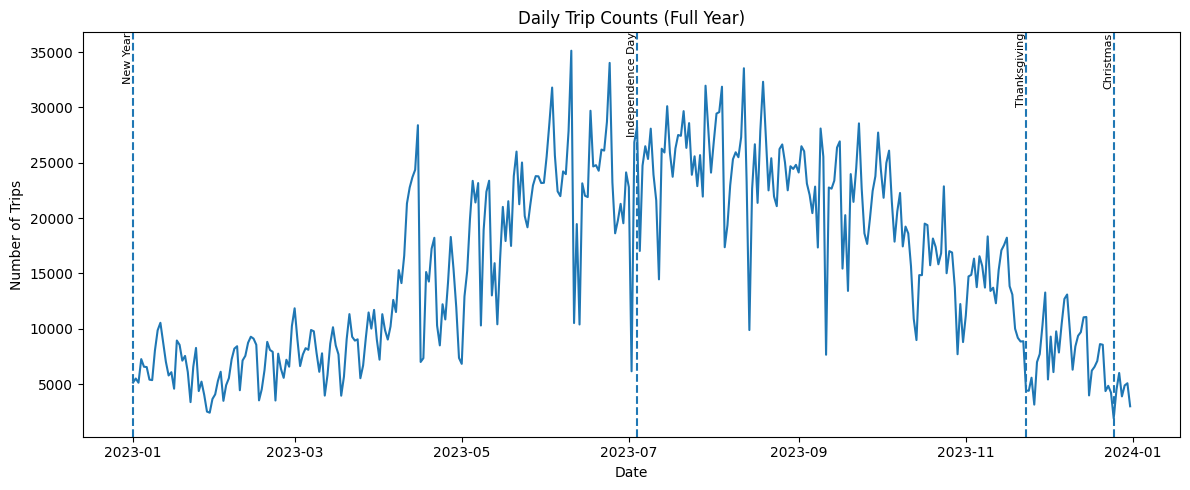

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Aggregate trips by day ---
df["date"] = df["started_at"].dt.date

daily_trips = (
    df.groupby("date")
      .size()
      .reset_index(name="trip_count")
)

# --- Define major holidays / events (EDIT as needed) ---
# Example: US holidays in 2023
holidays = {
    "New Year": "2023-01-01",
    "Independence Day": "2023-07-04",
    "Thanksgiving": "2023-11-23",
    "Christmas": "2023-12-25",
}

holiday_dates = pd.to_datetime(list(holidays.values()))

# --- Plot ---
plt.figure(figsize=(12, 5))
plt.plot(pd.to_datetime(daily_trips["date"]), daily_trips["trip_count"])
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Daily Trip Counts (Full Year)")

# Vertical lines for holidays
for name, date in holidays.items():
    plt.axvline(pd.to_datetime(date), linestyle="--")
    plt.text(pd.to_datetime(date), plt.ylim()[1],
             name, rotation=90, va="top", ha="right", fontsize=8)

plt.tight_layout()
plt.show()


**Inisghts**
* Number of trips peakes over the summer
* Lower numbers in winter
* Several unidentifieable peaks /lows (likely due to unidntified events or possibly weather conditions)

**2. Hourly patterns: Weekday vs. Weekend**

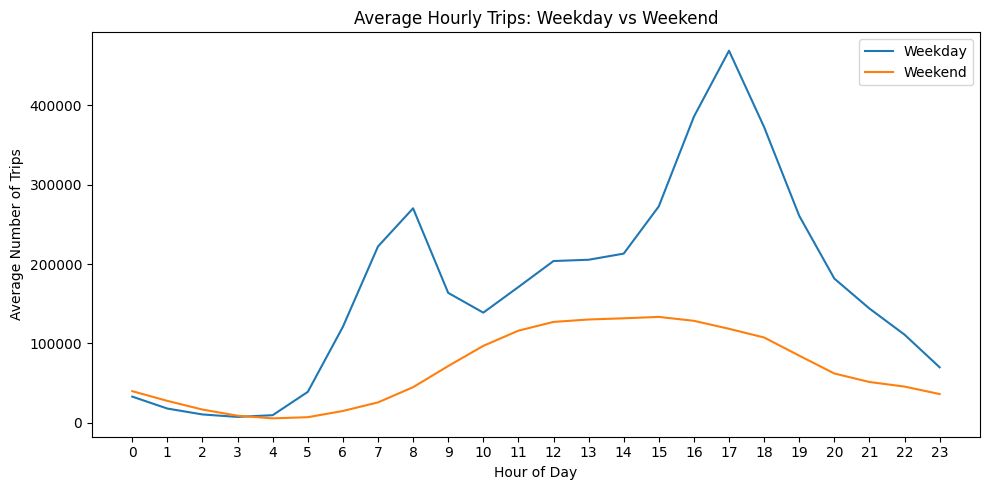

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Prepare time features ---
df["hour"] = df["started_at"].dt.hour
df["weekday"] = df["started_at"].dt.weekday          # 0=Mon … 6=Sun
df["is_weekend"] = df["weekday"] >= 5

# --- Average trips per hour ---
hourly_avg = (
    df.groupby(["is_weekend", "hour"])
      .size()
      .reset_index(name="trip_count")
)

weekday_avg = (
    hourly_avg[hourly_avg["is_weekend"] == False]
    .set_index("hour")["trip_count"]
)

weekend_avg = (
    hourly_avg[hourly_avg["is_weekend"] == True]
    .set_index("hour")["trip_count"]
)

# --- Overlay plot ---
plt.figure(figsize=(10, 5))
plt.plot(weekday_avg.index, weekday_avg.values, label="Weekday")
plt.plot(weekend_avg.index, weekend_avg.values, label="Weekend")

plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Trips")
plt.title("Average Hourly Trips: Weekday vs Weekend")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()


**Insights:**
* more trips on weekdays than weekends in general
* on weekdays, we see peaks during rush hours (around 7.30 am, 5pm)
* on weekends, most trips between 11am and 6pm

**3. Monthly trend with decomposition preview**



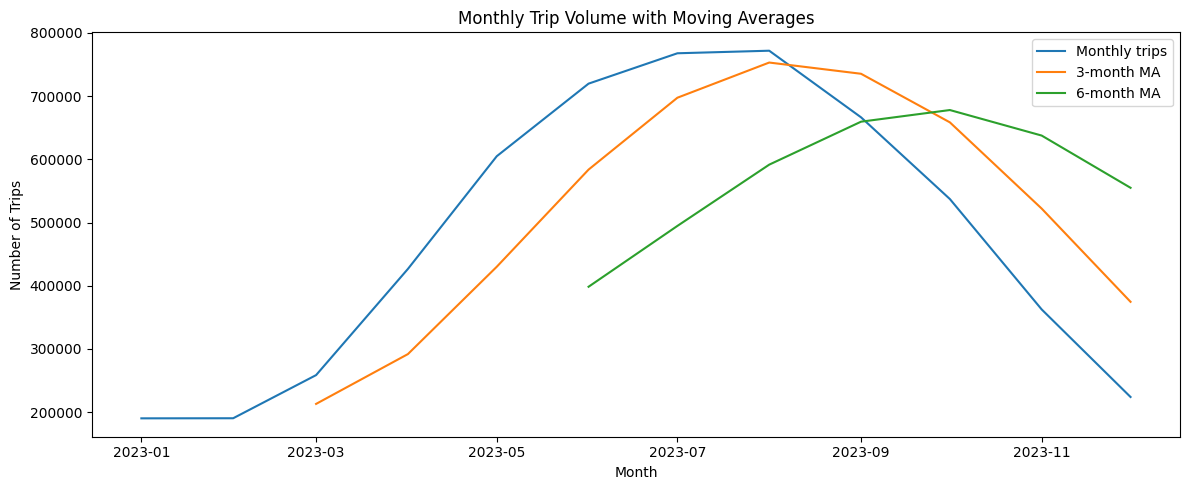

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Aggregate trips by month ---
df["month"] = df["started_at"].dt.to_period("M").dt.to_timestamp()

monthly_trips = (
    df.groupby("month")
      .size()
      .reset_index(name="trip_count")
      .sort_values("month")
)

# --- Moving average (choose window) ---
monthly_trips["ma_3"] = monthly_trips["trip_count"].rolling(window=3).mean()
monthly_trips["ma_6"] = monthly_trips["trip_count"].rolling(window=6).mean()
# (for monthly data, 3–6 months is more appropriate than 7/30 days)

# --- Plot ---
plt.figure(figsize=(12, 5))
plt.plot(monthly_trips["month"], monthly_trips["trip_count"], label="Monthly trips")
plt.plot(monthly_trips["month"], monthly_trips["ma_3"], label="3-month MA")
plt.plot(monthly_trips["month"], monthly_trips["ma_6"], label="6-month MA")

plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly Trip Volume with Moving Averages")
plt.legend()
plt.tight_layout()
plt.show()


* Strong **seasonality**: trips rise sharply from spring, peak in **July–August**, and decline steeply into winter.
* **3-month MA** closely tracks short-term momentum, highlighting rapid summer growth and early autumn slowdown.
* **6-month MA** smooths volatility, revealing a clear **single-cycle annual pattern** rather than structural trend changes.
* Peak levels followed by symmetric decline suggest demand is **weather- and leisure-driven**, not capacity-constrained.
* No evidence of long-term upward or downward trend within the observed year; variation is predominantly seasonal.


##Task 3.2: Spatial Overview
### 1. Station location map


In [ ]:
import pandas as pd
import numpy as np
import folium
from branca.colormap import LinearColormap

# ---- Build station table (origins) ----
stations = (
    df.dropna(subset=["start_station_id", "start_lat", "start_lng"])
      .groupby(["start_station_id", "start_station_name"], dropna=False)
      .agg(
          lat=("start_lat", "median"),
          lng=("start_lng", "median"),
          trips=("ride_id", "size"),
      )
      .reset_index()
)

# remove null or (0,0)
stations = stations.dropna(subset=["lat","lng"])
stations = stations[~((stations["lat"] == 0) & (stations["lng"] == 0))]

# ---- Quartiles (1..4) ----
stations["usage_quartile"] = pd.qcut(stations["trips"], 4, labels=[1,2,3,4]).astype(int)

# ---- Point size scaling ----
# radius ~ sqrt(trips) scaled to [3..15]
r = np.sqrt(stations["trips"])
stations["radius"] = 3 + (r - r.min()) * (15 - 3) / (r.max() - r.min() + 1e-9)

# ---- Color map for quartiles ----
quartile_colors = {1:"#2c7bb6", 2:"#abd9e9", 3:"#fdae61", 4:"#d7191c"}

# ---- Base map centered on stations ----
center = [stations["lat"].median(), stations["lng"].median()]
m1 = folium.Map(location=center, zoom_start=12, tiles="CartoDB positron")

# ---- Add station points ----
for _, row in stations.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=float(row["radius"]),
        color=quartile_colors[row["usage_quartile"]],
        fill=True,
        fill_opacity=0.75,
        popup=folium.Popup(
            f"{row['start_station_name']}<br>"
            f"ID: {row['start_station_id']}<br>"
            f"Trips: {row['trips']:,}<br>"
            f"Quartile: {row['usage_quartile']}",
            max_width=300
        ),
    ).add_to(m1)

# Legend (simple)
legend_html = """
<div style="position: fixed; bottom: 20px; left: 20px; z-index: 9999;
background: white; padding: 10px; border: 1px solid #ccc;">
<b>Usage quartile</b><br>
<span style="color:#2c7bb6;">●</span> Q1 (low)<br>
<span style="color:#abd9e9;">●</span> Q2<br>
<span style="color:#fdae61;">●</span> Q3<br>
<span style="color:#d7191c;">●</span> Q4 (high)<br>
</div>
"""
m1.get_root().html.add_child(folium.Element(legend_html))

m1



### 2. Geographic coverage assessment

In [ ]:
import folium

# --- Build bbox from station data (robust quantiles) ---
bbox = {
    "min_lat": stations["lat"].quantile(0.005),
    "max_lat": stations["lat"].quantile(0.995),
    "min_lng": stations["lng"].quantile(0.005),
    "max_lng": stations["lng"].quantile(0.995),
}

# --- Map ---
m2 = folium.Map(
    location=[stations["lat"].median(), stations["lng"].median()],
    zoom_start=12,
    tiles="CartoDB positron",
)

# --- Draw bbox ---
folium.Rectangle(
    bounds=[
        [bbox["min_lat"], bbox["min_lng"]],
        [bbox["max_lat"], bbox["max_lng"]],
    ],
    color="black",
    weight=2,
    fill=False,
    tooltip="Approx. city boundary (from data)",
).add_to(m2)

# --- Plot stations ---
for _, row in stations.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=float(row["radius"]),
        fill=True,
        fill_opacity=0.7,
        color=quartile_colors[row["usage_quartile"]],
    ).add_to(m2)

m2



**Insights:**

* Stations are **densely clustered along the lakefront and central city**, mirroring the highest-demand corridors.
* **Sparse station coverage inland and in the south/west** contrasts with trip activity, indicating reliance on dockless usage in those areas.
* High station density in the core suggests **capacity concentration rather than uniform accessibility**.
* Spatial mismatch between stations and trips supports treating **dockless trips as structurally valid**, not data gaps.
* Network design appears optimized for **tourism and high-traffic zones**, not citywide equity or coverage.


## Task 3.3: Pattern Discovery

**Member vs. casual user patterns:**

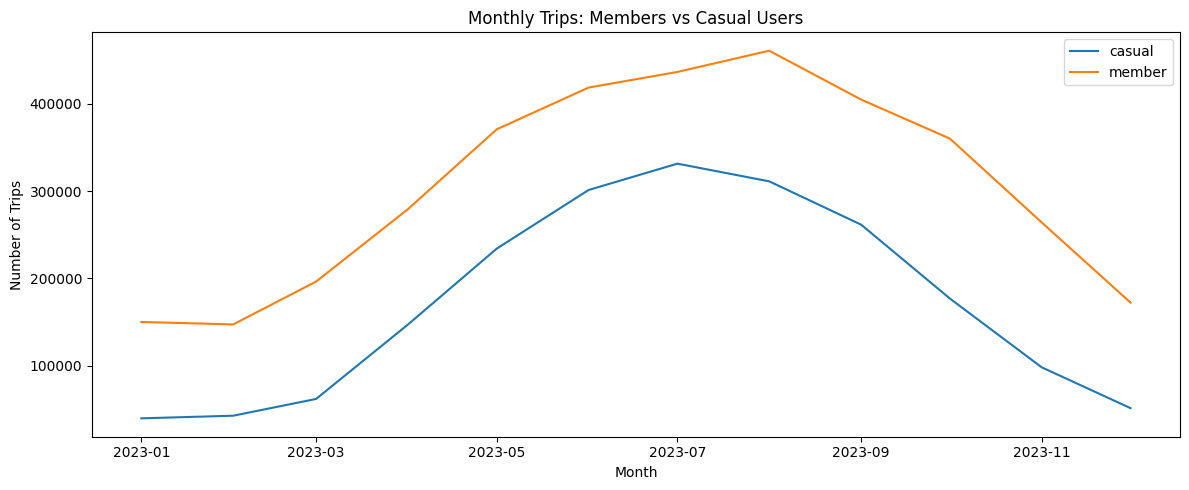

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Monthly aggregation by user type ---
df["month"] = df["started_at"].dt.to_period("M").dt.to_timestamp()

monthly_user = (
    df.groupby(["month", "member_casual"])
      .size()
      .reset_index(name="trip_count")
)

# --- Plot ---
plt.figure(figsize=(12, 5))
for user_type in monthly_user["member_casual"].unique():
    sub = monthly_user[monthly_user["member_casual"] == user_type]
    plt.plot(sub["month"], sub["trip_count"], label=user_type)

plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly Trips: Members vs Casual Users")
plt.legend()
plt.tight_layout()
plt.show()


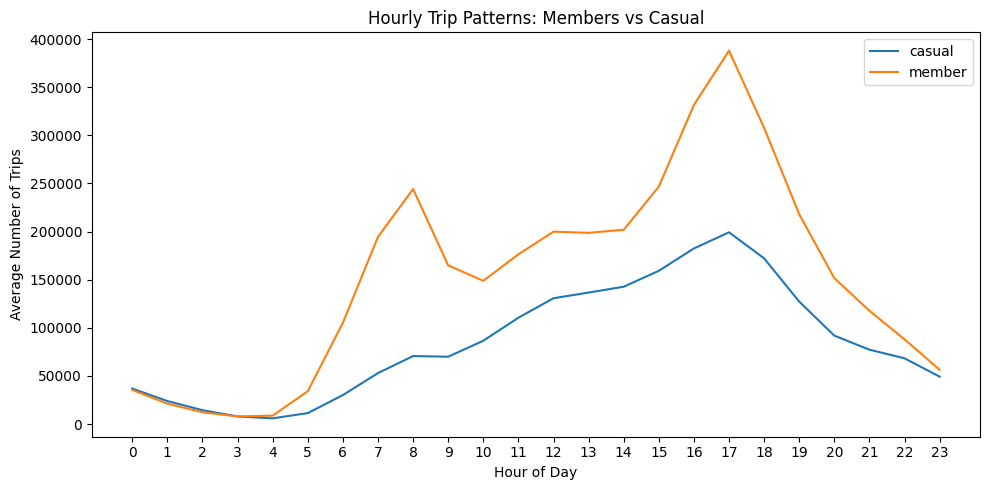

In [ ]:
# --- Hourly average by user type ---
df["hour"] = df["started_at"].dt.hour

hourly_user = (
    df.groupby(["member_casual", "hour"])
      .size()
      .reset_index(name="trip_count")
)

plt.figure(figsize=(10, 5))
for user_type in hourly_user["member_casual"].unique():
    sub = hourly_user[hourly_user["member_casual"] == user_type]
    plt.plot(sub["hour"], sub["trip_count"], label=user_type)

plt.xlabel("Hour of Day")
plt.ylabel("Average Number of Trips")
plt.title("Hourly Trip Patterns: Members vs Casual")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()


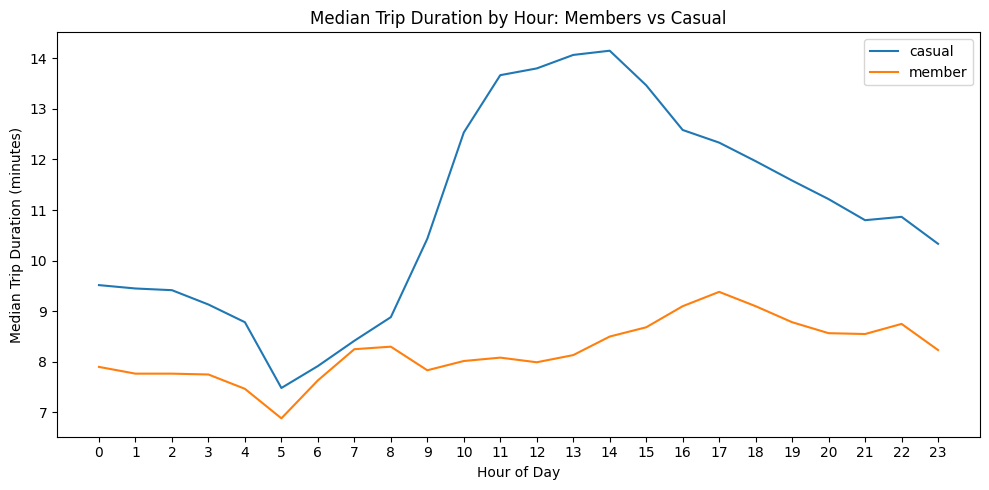

In [ ]:
# --- Median duration by hour and user type ---
dur_col = "duration_minutes"

dur_user = (
    df[df[dur_col].gt(0)]
    .groupby(["member_casual", "hour"])[dur_col]
    .median()
    .reset_index()
)

plt.figure(figsize=(10, 5))
for user_type in dur_user["member_casual"].unique():
    sub = dur_user[dur_user["member_casual"] == user_type]
    plt.plot(sub["hour"], sub[dur_col], label=user_type)

plt.xlabel("Hour of Day")
plt.ylabel("Median Trip Duration (minutes)")
plt.title("Median Trip Duration by Hour: Members vs Casual")
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.show()


**Insights**
* **Strong seasonality**: Both user types peak in summer; casual usage is far more seasonal, dropping sharply in winter, while member demand remains comparatively stable.
* **Members dominate volume year-round**: Members consistently generate more trips than casual users, indicating a commuter-driven core demand.
* **Clear commuter peaks for members**: Pronounced weekday rush-hour spikes (~8–9 AM, ~5–6 PM) confirm utilitarian, work-related usage.
* **Casual users skew to midday and afternoon**: Usage builds gradually and peaks later, aligning with leisure and tourism patterns.
* **Trip durations differ structurally**: Casual rides are consistently longer than member rides at all hours, especially midday.
* **Members optimize for short trips**: Member median durations stay low and stable, even during peak hours.
* **Operational implication**: Capacity and rebalancing should prioritize commuter corridors during peak hours, and leisure hotspots midday/weekends.


# Appendix

# Appendix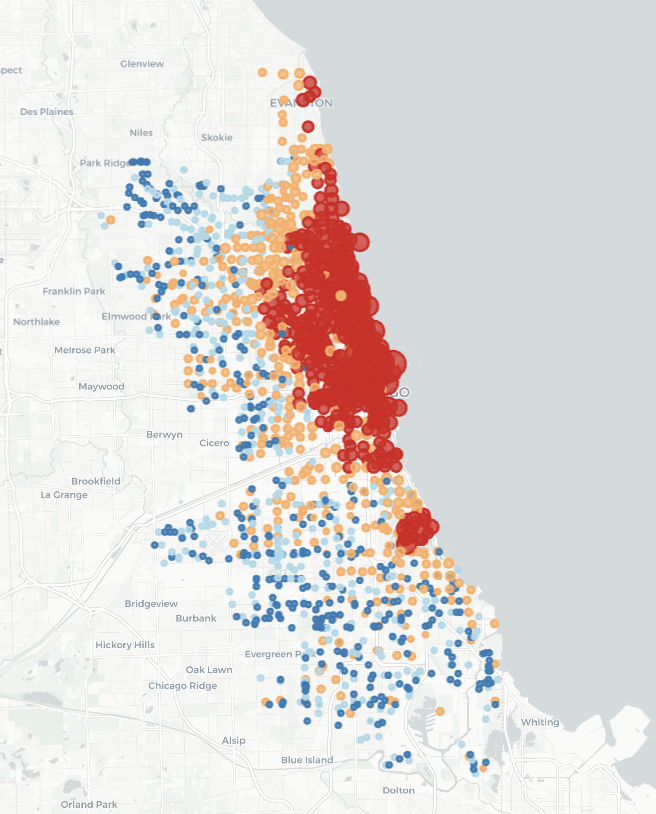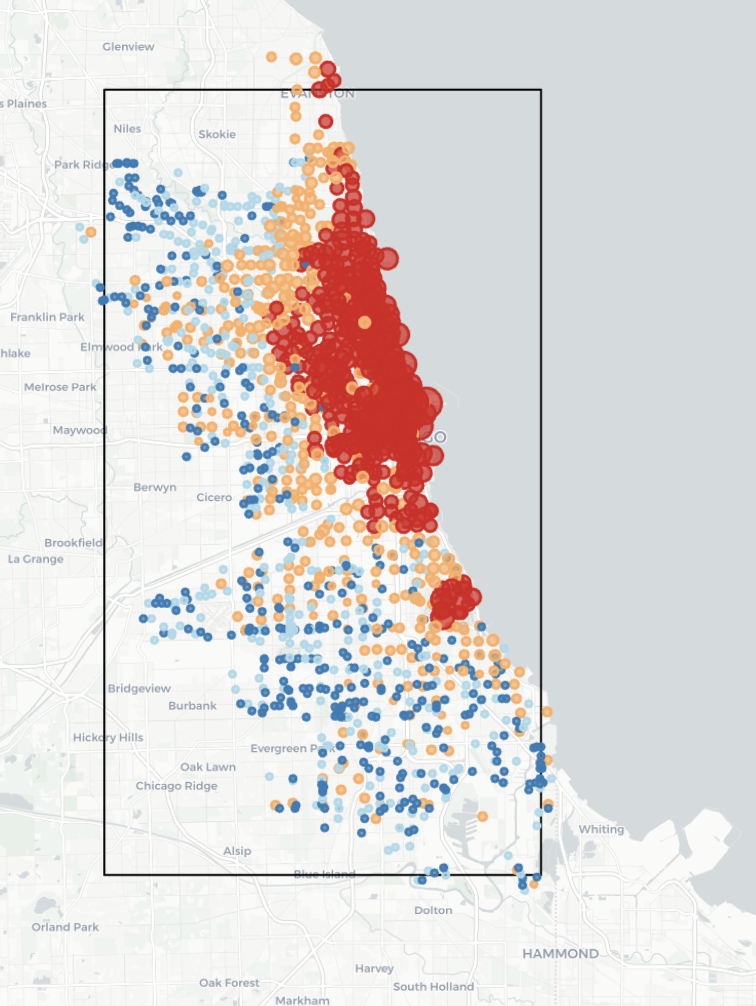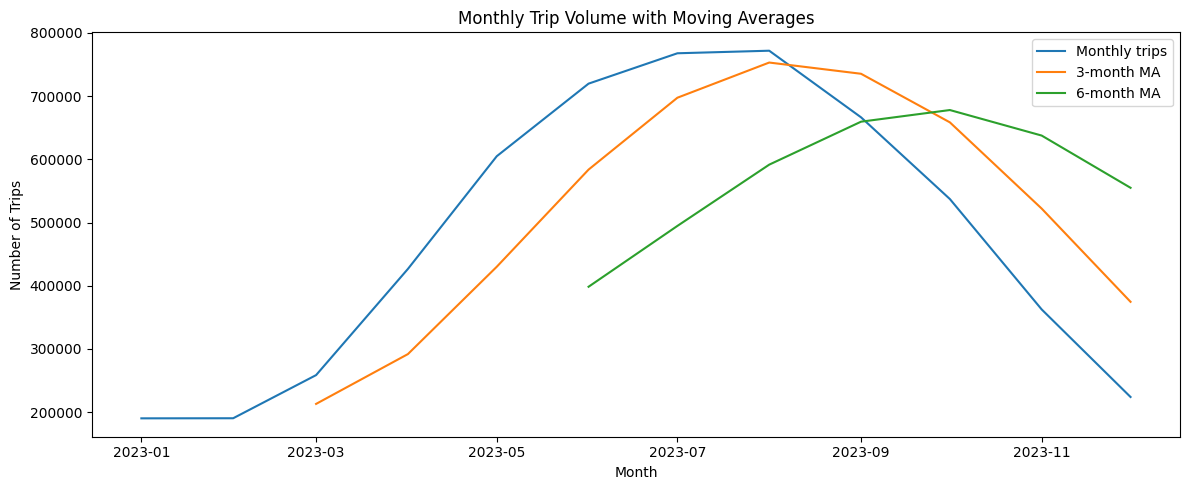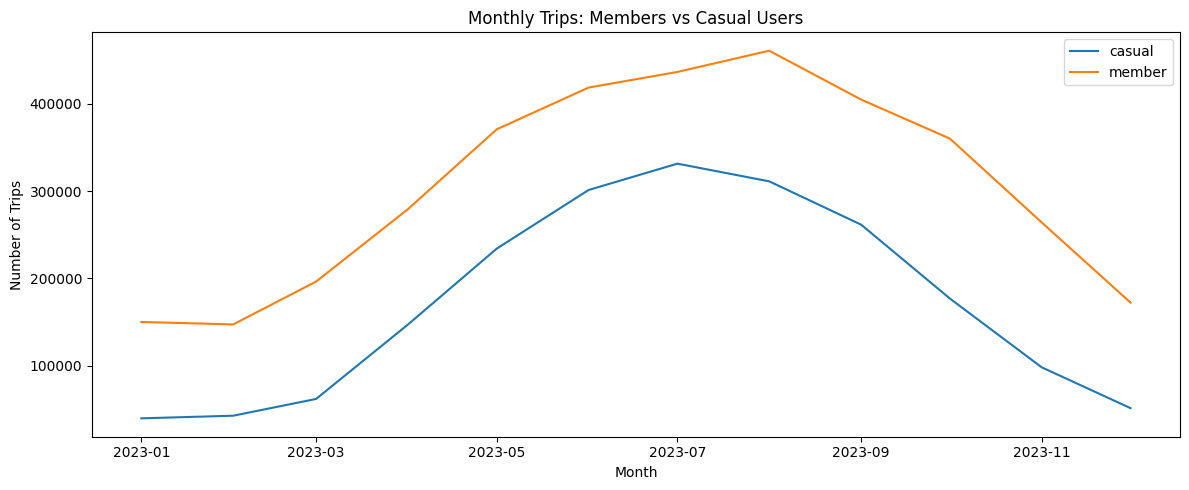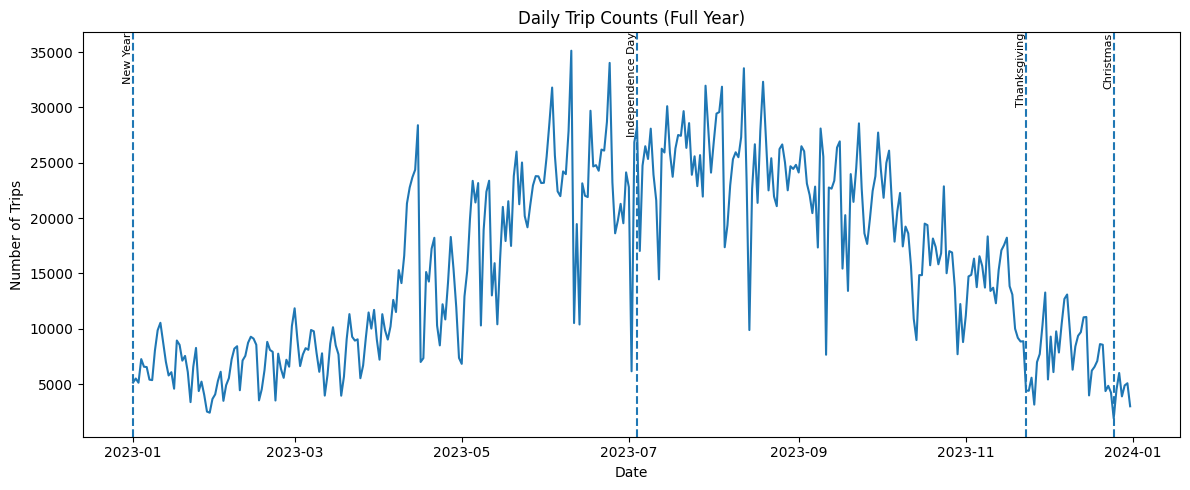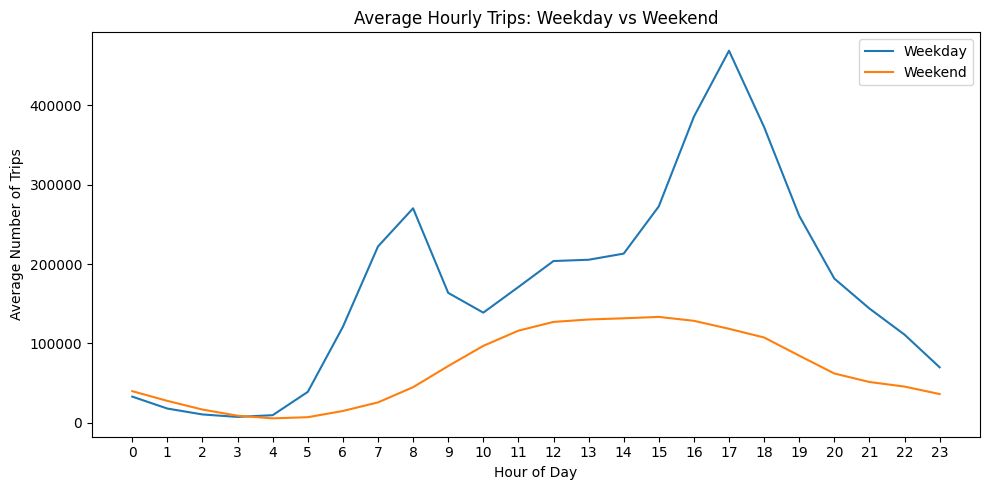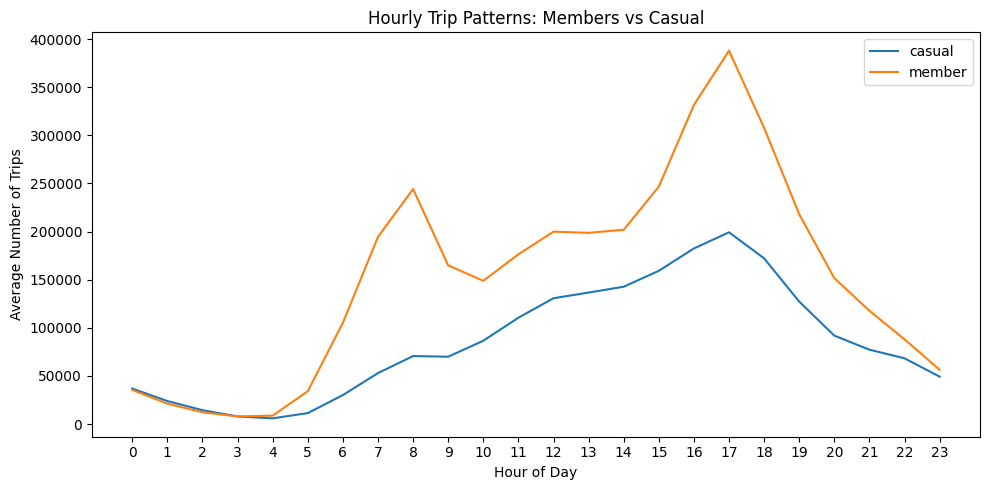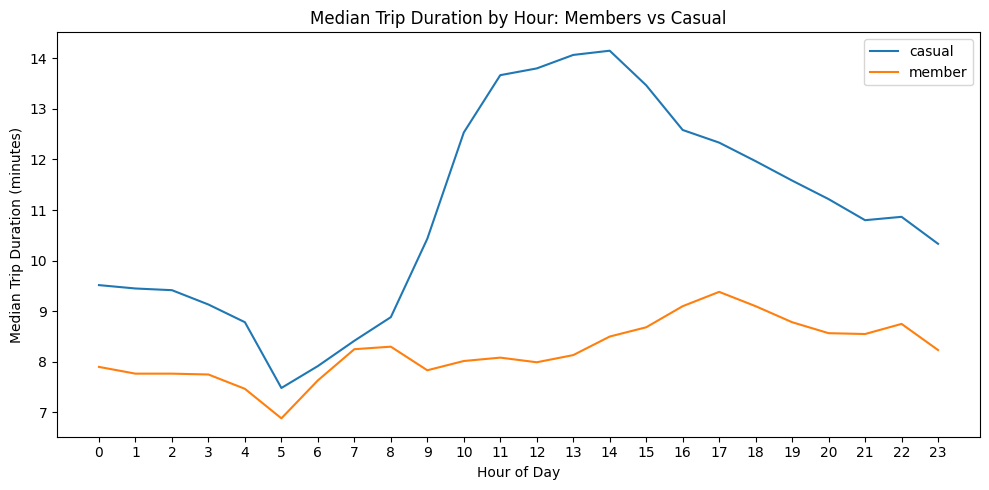